In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

In [8]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [11]:
measure = Base.classes.measurement
station = Base.classes.station

In [12]:
session = Session(engine)

In [136]:
#Query for precipitation data last 12 months
session.query(measure.prcp).\
    filter(measure.date >= '2016-08-23').\
    order_by(measure.date).all()

[(0.0),
 (0.15),
 (0.05),
 (None),
 (0.02),
 (1.79),
 (0.7),
 (0.08),
 (2.15),
 (2.28),
 (None),
 (1.22),
 (2.15),
 (1.45),
 (0.08),
 (0.08),
 (0.0),
 (0.0),
 (0.21),
 (0.06),
 (0.11),
 (0.0),
 (0.03),
 (0.02),
 (0.04),
 (0.0),
 (0.01),
 (0.0),
 (0.18),
 (0.02),
 (0.0),
 (0.12),
 (None),
 (0.01),
 (0.14),
 (0.14),
 (0.14),
 (0.6),
 (2.07),
 (0.0),
 (0.17),
 (0.04),
 (None),
 (0.0),
 (0.35),
 (0.9),
 (0.0),
 (0.0),
 (0.02),
 (0.0),
 (0.0),
 (0.05),
 (0.13),
 (0.1),
 (None),
 (None),
 (0.25),
 (0.24),
 (2.46),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.02),
 (0.01),
 (0.0),
 (0.02),
 (0.19),
 (None),
 (None),
 (0.01),
 (0.03),
 (0.0),
 (0.07),
 (0.08),
 (0.12),
 (1.0),
 (0.03),
 (0.03),
 (0.74),
 (0.14),
 (0.44),
 (None),
 (0.11),
 (None),
 (0.02),
 (0.03),
 (0.18),
 (None),
 (0.05),
 (0.04),
 (0.03),
 (0.11),
 (1.0),
 (0.05),
 (0.1),
 (0.23),
 (0.11),
 (0.16),
 (1.35),
 (0.0),
 (0.22),
 (0.01),
 (None),
 (0.01),
 (0.07),
 (0.15),
 (0.03),
 (0.01),
 (0.29),
 (None),
 (0.23),
 (0.16),
 (0.35),


In [137]:
#Calculate date one year before last date in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [138]:
#retrieve date & precipitation scores
data = session.query(measure.date,measure.prcp).\
    filter(measure.date >= '2016-08-23').\
    order_by(measure.date).all()

In [139]:
datadf = pd.DataFrame(data)

In [140]:
datadf['prcp'] = datadf['prcp'].fillna(0)

In [141]:
datadf1 = datadf.sort_values(by ='date')

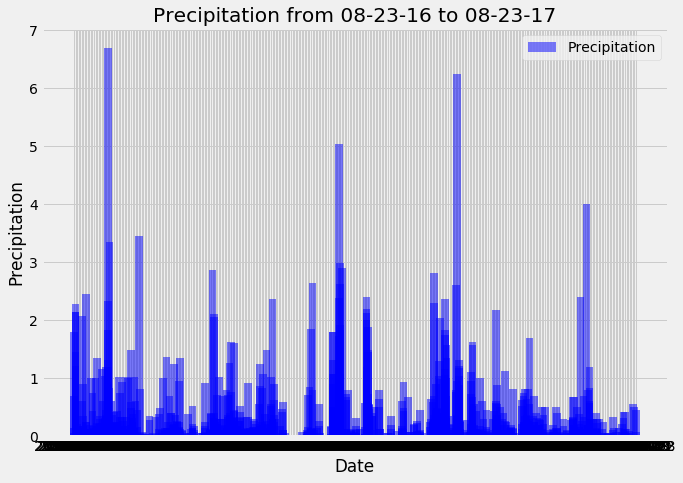

In [148]:
datadfinal = datadf1.set_index('date')
prcp = datadfinal['prcp']

x = datadfinal.index.tolist()
y = datadfinal['prcp'].tolist()

plt.figure(figsize=(10,7))
plt.bar(x,y,width = 5 ,color='b', alpha=0.5, align="center",label='Precipitation')
plt.title(f"Precipitation from 08-23-16 to 08-23-17")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.show()

In [128]:
#station count
station_total = session.query(func.count(station.station)).all()
station_total

[(9)]

In [21]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [29]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [59]:
engine.execute('SELECT * FROM measurement limit 9').all

In [104]:
stations = session.query(measure.id, measure.station).all()
stations
stationsdf = pd.DataFrame(stations)
count = stationsdf.groupby('station').count()
count1 = count.sort_values(by = 'id', ascending=False)
count2 = count1.rename(columns={'id': 'count'})
count2

,count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [134]:
query_result = session.query(measure.tobs).\
    filter(measure.station == 'USC00519281').\
    filter(measure.date >= '2016-08-23').all()
temps = list(np.ravel(query_result))
temps

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

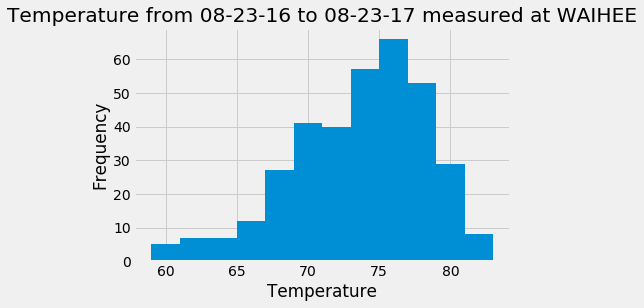

In [144]:
plt.hist(temps, bins=12,rwidth=1.0,label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f"Temperature from 08-23-16 to 08-23-17 measured at WAIHEE")
plt.show()